# Case study for male wages in 1980

In [18]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read CSV file
wage2 = pd.read_csv(r'C:\Users\Computer\Desktop\Github\04 Male Wage Disparity\WAGE2.csv',
                   index_col = False, delimiter =',')

# Remove first empty column, fill NaN
del wage2[wage2.columns[0]]
wage2 = wage2.fillna(0)

## Understanding the Data

The data set contains information regarding the monthly earnings, employment history, education, demographic characteristics, black or not black, and other similar information for 935 men in the year 1980.

# Part 1 Did black men earn less than non-black men?

This section will focus on highlighting and proving the wage desparity between black and non-black men. We can accomplish this by conducting a two sample T-test. This will allow us to see how accurate the sample is to the representing population. 

#### Step 1. Generate the mean of variable wage for black and nonblack men.

Before performing the T-test, it is valuable to find the mean variable wages of nonblack and black men to see if within the sample exist a difference. We can also use the results in to perform the T-test. 

In [19]:
# Sample mean of variable wages of nonblack men

# Filter for non-black men (Black == 0)
nonblack_men = wage2[wage2['black'] == 0]

# Compute the requested statistics
count_obs = nonblack_men.shape[0]  # Count of observations
avg_lwage = round(nonblack_men['lwage'].mean(), 3)
stddev_lwage = round(nonblack_men['lwage'].std(), 3)  # Standard deviation
min_lwage = round(nonblack_men['lwage'].min(), 3)
max_lwage = round(nonblack_men['lwage'].max(), 3)

# Display results
result = (count_obs, avg_lwage, stddev_lwage, min_lwage, max_lwage)
print(result)

(815, np.float64(6.816), np.float64(0.412), np.float64(4.745), np.float64(8.032))


In [20]:
# Sample mean of variable wages of black men
black_men = wage2[wage2['black'] == 1]

# Compute the requested statistics
count_obs = black_men.shape[0]  # Count of observations
avg_lwage = round(black_men['lwage'].mean(), 3)
stddev_lwage = round(black_men['lwage'].std(), 3)  # Standard deviation
min_lwage = round(black_men['lwage'].min(), 3)
max_lwage = round(black_men['lwage'].max(), 3)

result = (count_obs, avg_lwage, stddev_lwage, min_lwage, max_lwage)
print(result)

# [(120, 6.524, 0.392, 5.561, 7.536)]

(120, np.float64(6.524), np.float64(0.394), np.float64(5.561), np.float64(7.536))


#### Step 2. Write down a null and alternative hypothesis for wages.

Ho:E(Y) = 0 or the Null Hypothesis. This result means that wages of black and nonblack men are equal

Ho:E(Y) /= 0 or the Alternative Hypothesis. This result means that wages of black and nonblack men are not equal

#### Step 3. Perform a T-test

There are many ways to perform a T-test, the quickest way is to use the formulas and algebra with the data given from the SQL queries previously.

A T-test produces two outputs, the Degrees of Freedom and the T-value.

In [21]:
# T-Test (Wage) using SQL query data
import math 

DF = (815 + 120) - 2 
TValue = round((6.816 - 6.524) / math.sqrt(((0.412**2) / 815) + ((0.392**2) / 120)),3)

print("The Degrees of Freedom is ",DF)
print("The T-Value is ",TValue)

The Degrees of Freedom is  933
The T-Value is  7.568


We can use the results of the T-test to reject or accept the Null Hypothesis at a certain confidence interval. In layman terms, a confidence interval is the level of confidence that this sample is representative of the actual population.

Here is a cheat sheet for using DF and T-Value. http://simulation-math.com/TDistTable.pdf.

From our data, we are 99.95% confident that the sample data represents the actual wage difference of black and non-black men. And on average, black men have a lower wage of 4.28% per month compared to nonblack men.



# Part 2 Dive deeper. Why black men are paid less?

Well great, it doesn't take a rocket-scientist to know that black men were paid less in 1980. 

One theory explaining the wage disparity for black men during this time was education disparity. We can perform another T-test to examine the education difference between black and non-black men.

#### Step 1. Generate the mean of education years for black and nonblack men.

In [22]:
# Sample mean of variable education of nonblack men

# Filter for non-black men
nonblack_men = wage2[wage2['black'] == 0]

# Compute statistics for the 'educ' variable
count_obs = nonblack_men.shape[0]  # Count of observations
avg_educ = round(nonblack_men['educ'].mean(), 3)  # Mean of 'educ'
stddev_educ = round(nonblack_men['educ'].std(), 3)  # Standard deviation
min_educ = round(nonblack_men['educ'].min(), 3)  # Minimum value
max_educ = round(nonblack_men['educ'].max(), 3)  # Maximum value

# Display results
educ_result = (count_obs, avg_educ, stddev_educ, min_educ, max_educ)
print(educ_result)

(815, np.float64(13.62), np.float64(2.217), np.int64(9), np.int64(18))


In [23]:
# Sample mean of variable education of black men

# Filter for black men
black_men = wage2[wage2['black'] == 1]

# Compute statistics for the 'educ' variable
count_obs = black_men.shape[0]  # Count of observations
avg_educ = round(black_men['educ'].mean(), 3)  # Mean of 'educ'
stddev_educ = round(black_men['educ'].std(), 3)  # Standard deviation
min_educ = round(black_men['educ'].min(), 3)  # Minimum value
max_educ = round(black_men['educ'].max(), 3)  # Maximum value

# Display results
educ_result = (count_obs, avg_educ, stddev_educ, min_educ, max_educ)
print(educ_result)

# [(120, Decimal('12.442'), 1.731, 9, 18)]

(120, np.float64(12.442), np.float64(1.738), np.int64(9), np.int64(18))


#### Step 2. Write down a null and alternative hypothesis for Education.

Ho:E(Y) = 0 or the Null Hypothesis. This result means that education of black and nonblack men are equal

Ho:E(Y) /= 0 or the Alternative Hypothesis. This result means that education of black and nonblack men are not equal

#### Step 3. Perform a T-test

In [24]:
# T-test (Education) using SQL query data
import math 

DF = (815 + 120) - 2  # 2 is used because there are two samples
TValue = round((13.620 - 12.442) / math.sqrt(((2.216**2) / 815) + ((1.731**2) / 120)),3)

print("The Degrees of Freedom is ",DF)
print("The T-Value is ",TValue)

The Degrees of Freedom is  933
The T-Value is  6.691


We can see the difference in the mean years of education between both demographics in the sample. Using a T-test confirms this is true in the overall population as well.

Our T-Value is 6.691, so we are over 99.95% confident our results are true. And on average black men have 8.65% less education years compared to nonblack men.

#### Conclusion

If you are the average black man in 1980, you are extremely likely to have less education than a white man. And you are also likely to get paid less than your nonblack counterpart.

## Part 3. How important is education for earning a higher wage?

Based on our previous conclusion, we can make the assumption that education and wage is correlated. But lets examine the continued relation between education and wage using a linear regression. 

With a linear regression we can estimate on average how much an additional year of education would affect your monthly wages and how much you would make with zero education. We use this information to forecast whether it would have been worth the years of education for a man in the 1980's.

#### Step 1. Understanding the linear regression model.

#### lwage= β0 + β1educ + u 

lwage: Monthly wage

β0: The intercept, how much you would get paid without any years of education

β1educ: The causal effect between monthly wages and years. This is only a true association if β1educ is not affected directly by u.

u: An error term that cannot be measured within the regression. An example of such is work ethic between different cities that was sampled.

#### Step 2. Performing the linear regression and visualization.

Estimated coefficients:
β0 = 146.952439749056            
β1 = 60.21428323946896


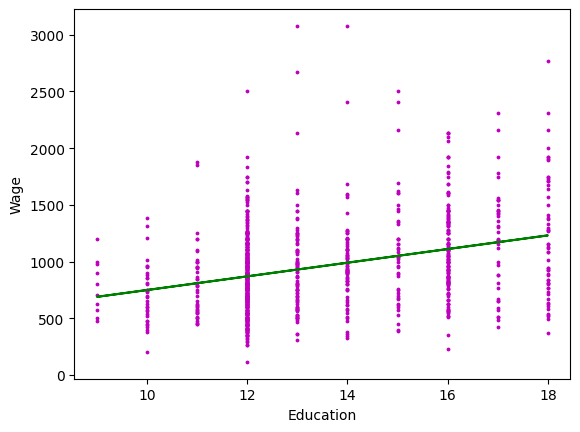

In [25]:
# Linear regression of Education and Monthly Wage
 
def estimate_coef(x, y):
    # number of observations
    n = np.size(x)
 
    # mean x and y
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # cross deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return (b_0, b_1)
 
def plot_regression_line(x, y, b):
    # plotting points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 3)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting regression line
    plt.plot(x, y_pred, color = "g")
 
    # plot
    plt.xlabel('Education')
    plt.ylabel('Wage')
    plt.show()
 
def main():
    # data
    x = (wage2['educ'].to_numpy())
    y = (wage2['wage'].to_numpy())
 
    # coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nβ0 = {}  \
          \nβ1 = {}".format(b[0], b[1]))
 
    # plotting regression line
    plot_regression_line(x, y, b)
 
if __name__ == "__main__":
    main()

The formula result is:

lwage= 146.952 + (60.214)educ + u

Which means that a man with no education will make 146.952 per month. And with every year of education he gets, it adds an additional 60.214 per month.

#### Step 3. Forecasting

How much does a highschool educated man make compared to someone who has never had any education?

Someone with zero education at all would make a log earning of 146.952. While someone with highschool education would make 1230.804 per month with 18 years of education.

However, if we look at the visualization you will spot many individuals with high deviation from the mean. On average you are likely to make more with continued education. This applies to a sample or population instead of a person to person basis.